In [1]:
import numpy as np
import scipy
from scipy.ndimage import gaussian_filter1d
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
%matplotlib inline
import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf
import pingouin as pg
import trial_correlates as tc
import tqdm
import misc

import switch_analysis_one_session as saos
reload(saos)

reload(misc)

from collections import OrderedDict

67 sessions!
67 sessions!


In [2]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/cosyne'

In [3]:
db_sorted = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
data_dir_full = db_sorted['data_dir_full'][0]

In [4]:
%%time
reload(pf)
place_field_res_l = OrderedDict()
for ii in tqdm.tqdm(range(len(db_sorted['data_dir_full']))):
    ddf = db_sorted['data_dir_full'][ii]
    pf_res =pf.field_detection_both_avg_trial_wrapper(ddf, dosave=True,force_reload=False,nbins = 100, 
                                        save_fn = 'place_field_avg_and_trial_vthresh.p', 
                                        shuffle_fn='fr_map_null_trialtype_vthresh.p',
                                        smth_in_bin=2.5, speed_thresh=1.,speed_key='v',load_only=True
                                        )
    ani = db_sorted.iloc[ii]['animal_name.1']
    sess = db_sorted.iloc[ii]['sess_name']
    place_field_res_l[ani,sess] = pf_res
    

  3%|▎         | 2/67 [00:00<00:03, 18.18it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


  6%|▌         | 4/67 [00:00<00:03, 17.31it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 12%|█▏        | 8/67 [00:00<00:02, 25.81it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210111/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 18%|█▊        | 12/67 [00:00<00:01, 30.01it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211211/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210203/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 37%|███▋      | 25/67 [00:00<00:01, 31.32it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211210/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211124/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210331/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_avg_and_trial_vthresh.p e

 70%|███████   | 47/67 [00:01<00:00, 63.25it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210319/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210315/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210322/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201002/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200723/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200716/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200920/py_data/place_field_avg_and_trial_vthresh.p e

100%|██████████| 67/67 [00:01<00:00, 51.27it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200923/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200720/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201121/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201001/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200717/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201121/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200823/py_data/place_field_avg_and_trial_vthresh.p exists; loa

In [4]:
# load switch detection result
res_to_save_data_detection_l = pickle.load(open(os.path.join('/mnt/home/szheng/ceph/place_variability/data','switch_res_allromsess.p'),'rb'))




In [6]:
sess_selected = db_sorted.loc[db_sorted['n_pyr_putative'] >= 50,'sess_name']

In [7]:
switch_detection_res_allsess = {}
# for detection in ['avg','trial_filter']:
for detection in ['avg']:
    switch_detection_res_allsess[detection]={}
    for key in ['sig','cdf','changes_df']:
        switch_detection_res_allsess[detection][key] = pd.concat({k:val[detection][key] if val is not None else None for k,val in res_to_save_data_detection_l.items()},axis=0)
        switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
        
    switch_detection_res_allsess[detection]['sig_pos'] = switch_detection_res_allsess[detection]['sig'] * (switch_detection_res_allsess[detection]['cdf'] > 0.95)
    
    

/tmp/ipykernel_162200/876578009.py:7: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
/tmp/ipykernel_162200/876578009.py:7: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
/t

In [22]:
db_sorted.loc['e16_1f1']

,data_dir_full,sess_name,animal_name.1,date,behavior,performance,ntrials,ngoodtrials,n_neurons,n_pyr_putative,owner,data_root
8,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...,e16_1f1_201002,e16_1f1,2020-10-02,alternation,0.684211,19,19,91,75,roman,roman_data
9,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...,e16_1f1_201004,e16_1f1,2020-10-04,alternation,0.739130,23,23,81,66,roman,roman_data
5,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...,e16_1f1_200920,e16_1f1,2020-09-20,alternation,0.809524,21,21,76,62,roman,roman_data
2,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...,e16_1f1_200917,e16_1f1,2020-09-17,alternation,0.631579,19,19,62,52,roman,roman_data
3,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...,e16_1f1_200918,e16_1f1,2020-09-18,alternation,0.520000,25,25,63,52,roman,roman_data
4,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...,e16_1f1_200919,e16_1f1,2020-09-19,alternation,0.571429,28,28,65,52,roman,roman_data
6,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...,e16_1f1_200923,e16_1f1,2020-09-23,alternation,0.761905,21,21,65,50,roman,roman_data
7,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...,e16_1f1_201001,e16_1f1,2020-10-01,alternation,0.631579,19,19,54,44,roman,roman_data
0,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...,e16_1f1_200823,e16_1f1,2020-08-23,alternation,0.631579,19,19,47,32,roman,roman_data
1,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...,e16_1f1_200824,e16_1f1,2020-08-24,alternation,0.571429,21,21,40,27,roman,roman_data


In [27]:
pd.set_option('display.max_colwidth', None)

In [47]:
switch_detection_res_allsess['avg']['sig_pos'].loc[(slice(None),slice(None),slice(None),slice(None),0.3,'switch_magnitude',0.4),'on'].loc[:,5:]




5  6  7  8    9   \
e13_26m1 e13_26m1_210913 0 0 0.3 switch_magnitude 0.4  False  0  0  0    0   
                           1 0.3 switch_magnitude 0.4  False  0  0  0    0   
e15_13f1 e15_13f1_220117 0 0 0.3 switch_magnitude 0.4  False  0  0  0    0   
                           1 0.3 switch_magnitude 0.4  False  0  0  0    0   
         e15_13f1_220118 0 0 0.3 switch_magnitude 0.4  False  0  0  0    0   
...                                                      ... .. .. ..  ...   
e14_2m3  e14_2m3_201208  0 1 0.3 switch_magnitude 0.4  False  0  0  0    0   
         e14_2m3_201206  0 0 0.3 switch_magnitude 0.4  False  0  0  0    0   
                           1 0.3 switch_magnitude 0.4  False  0  0  0    0   
e16_1f1  e16_1f1_200923  0 0 0.3 switch_magnitude 0.4  False  0  0  0    0   
                           1 0.3 switch_magnitude 0.4  False  0  0  0  NaN   

                                                        10   11   12   13  \
e13_26m1 e13_26m1_210913 0 0 0.3 switch_magnitude 0.4    0    0    0    0   
                           1 0.3 switch_magnitude 0.4    0    0    0    0   
e15_13f1 e15_13f1_220117 0 0 0.3 switch_magnitude 0.4    0    0    0    0   
                           1 0.3 switch_magnitude 0.4    0    0  NaN  NaN   
         e15_13f1_220118 0 0 0.3 switch_magnitude 0.4    0    0    0    0   
...                                                    ...  ...  ...  ...   
e14_2m3  e14_2m3_201208  0 1 0.3 switch_magnitude 0.4    0    0    0    0   
         e14_2m3_201206  0 0 0.3 switch_magnitude 0.4    0    0    0    0   
                           1 0.3 switch_magnitude 0.4    0    0    0    0   
e16_1f1  e16_1f1_200923  0 0 0.3 switch_magnitude 0.4    0    0    0  NaN   
                           1 0.3 switch_magnitude 0.4  NaN  NaN  NaN  NaN   

                                                        14  ...   27   28  \
e13_26m1 e13_26m1_210913 0 0 0.3 switch_magnitude 0.4    0  ...    0    0   
                           1 0.3 switch_magnitude 0.4    0  ...    0    0   
e15_13f1 e15_13f1_220117 0 0 0.3 switch_magnitude 0.4    0  ...  NaN  NaN   
                           1 0.3 switch_magnitude 0.4  NaN  ...  NaN  NaN   
         e15_13f1_220118 0 0 0.3 switch_magnitude 0.4    0  ...  NaN  NaN   
...                                                    ...  ...  ...  ...   
e14_2m3  e14_2m3_201208  0 1 0.3 switch_magnitude 0.4    0  ...  NaN  NaN   
         e14_2m3_201206  0 0 0.3 switch_magnitude 0.4    0  ...  NaN  NaN   
                           1 0.3 switch_magnitude 0.4    0  ...  NaN  NaN   
e16_1f1  e16_1f1_200923  0 0 0.3 switch_magnitude 0.4  NaN  ...  NaN  NaN   
                           1 0.3 switch_magnitude 0.4  NaN  ...  NaN  NaN   

                                                        29   30   31   32  \
e13_26m1 e13_26m1_210913 0 0 0.3 switch_magnitude 0.4    0    0    0    0   
                           1 0.3 switch_magnitude 0.4    0    0    0    0   
e15_13f1 e15_13f1_220117 0 0 0.3 switch_magnitude 0.4  NaN  NaN  NaN  NaN   
                           1 0.3 switch_magnitude 0.4  NaN  NaN  NaN  NaN   
         e15_13f1_220118 0 0 0.3 switch_magnitude 0.4  NaN  NaN  NaN  NaN   
...                                                    ...  ...  ...  ...   
e14_2m3  e14_2m3_201208  0 1 0.3 switch_magnitude 0.4  NaN  NaN  NaN  NaN   
         e14_2m3_201206  0 0 0.3 switch_magnitude 0.4  NaN  NaN  NaN  NaN   
                           1 0.3 switch_magnitude 0.4  NaN  NaN  NaN  NaN   
e16_1f1  e16_1f1_200923  0 0 0.3 switch_magnitude 0.4  NaN  NaN  NaN  NaN   
                           1 0.3 switch_magnitude 0.4  NaN  NaN  NaN  NaN   

                                                        33   34   35   36  
e13_26m1 e13_26m1_210913 0 0 0.3 switch_magnitude 0.4  NaN  NaN  NaN  NaN  
                           1 0.3 switch_magnitude 0.4    0    0    0    0  
e15_13f1 e15_13f1_220117 0 0 0.3 switch_magnitude 0.4  NaN  NaN  NaN  NaN  
                           1 0.3 switch_ma

In [49]:
# any_sig_on = switch_detection_res_allsess['avg']['sig_pos'].loc[(slice(None),slice(None),slice(None),slice(None),0.3,'switch_magnitude',0.4),'on'].any(axis=1).unstack(level=(0,1)).T.any(axis=1).sort_index()

any_sig_on = switch_detection_res_allsess['avg']['sig_pos'].loc[(slice(None),slice(None),slice(None),slice(None),0.3,'switch_magnitude',0.4),'on'].loc[:,5:].any(axis=1).unstack(level=(0,1)).T.any(axis=1).sort_index()

# db_sorted.reset_index(drop=True).set_index('sess_name').loc[any_sig_on.loc[~any_sig_on].index.get_level_values(1)][['data_dir_full','ntrials','n_neurons','performance']]
db_sorted.reset_index(drop=True).set_index('sess_name').loc[any_sig_on.loc[any_sig_on].index.get_level_values(1)][['data_dir_full','ntrials','n_neurons','performance']]


,data_dir_full,ntrials,n_neurons,performance
e13_16f1_210328,/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328,20,211,0.850000
e13_26m1_211019,/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019,78,271,0.730769
e14_2m3_201125,/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201125,21,74,0.904762
e15_13f1_220118,/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118,27,363,0.740741
e15_9f1_200809,/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200809,19,128,0.789474
e16_3m1_210203,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210203,21,182,0.904762
e16_3m2_211212,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212,28,200,0.821429
e16_3m2_211213,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213,54,207,0.703704


In [159]:
# tot significant ratio
detection='avg'
n_sess_tot = switch_detection_res_allsess[detection]['sig_pos'].unstack(level=(-1,-2,-3)).shape[0]
anyswitch_per_all = switch_detection_res_allsess[detection]['sig_pos'].groupby(level=0,axis=1).any()
# nsess_anyswitch_sum= anyswitch_per_all.groupby(level=(4,5,6)).sum()
# nsess_anyswitch_ratio = nsess_anyswitch_sum / n_sess_tot
# nsess_anyswitch_ratio
anyswitch_ratio = anyswitch_per_all.unstack(level=(4,5,6)).mean()
anyswitch_ratio

off  raw  switch_magnitude  0.0    0.659574
                            0.2    0.382979
                            0.4    0.234043
                            0.6    0.159574
     0.3  switch_magnitude  0.0    0.223404
                            0.2    0.202128
                            0.4    0.234043
                            0.6    0.212766
     0.5  switch_magnitude  0.0    0.287234
                            0.2    0.244681
                            0.4    0.297872
                            0.6    0.276596
on   raw  switch_magnitude  0.0    0.638298
                            0.2    0.542553
                            0.4    0.404255
                            0.6    0.255319
     0.3  switch_magnitude  0.0    0.148936
                            0.2    0.180851
                            0.4    0.212766
                            0.6    0.202128
     0.5  switch_magnitude  0.0    0.191489
                            0.2    0.159574
                            0.4 

In [181]:
anyswitch_per_all_resetindex

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,off,on
0,e13_26m1,e13_26m1_210913,0,0,raw,switch_magnitude,0.0,True,True
1,e13_26m1,e13_26m1_210913,0,0,raw,switch_magnitude,0.2,True,False
2,e13_26m1,e13_26m1_210913,0,0,raw,switch_magnitude,0.4,True,True
3,e13_26m1,e13_26m1_210913,0,0,raw,switch_magnitude,0.6,False,False
4,e13_26m1,e13_26m1_210913,0,0,0.3,switch_magnitude,0.0,True,False
...,...,...,...,...,...,...,...,...,...
1123,e16_1f1,e16_1f1_200923,0,1,0.3,switch_magnitude,0.6,False,True
1124,e16_1f1,e16_1f1_200923,0,1,0.5,switch_magnitude,0.0,True,False
1125,e16_1f1,e16_1f1_200923,0,1,0.5,switch_magnitude,0.2,True,False
1126,e16_1f1,e16_1f1_200923,0,1,0.5,switch_magnitude,0.4,True,False


In [184]:
anyswitch_per_all_resetindex=anyswitch_per_all.reset_index()
anyswitch_per_all_resetindex.columns = ['animal','session','task_index','trialtype_index','penalty','criterion','threshold','off','on']



<AxesSubplot:xlabel='penalty', ylabel='on'>

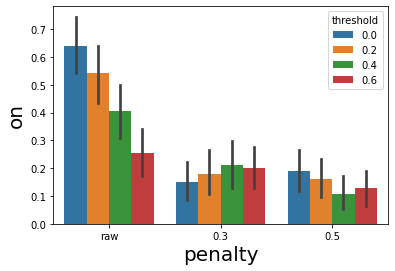

In [186]:
sns.barplot(data=anyswitch_per_all_resetindex,x='penalty',y='on',hue='threshold')

In [190]:
anyswitch_per_all_resetindex

,animal,session,task_index,trialtype_index,penalty,criterion,threshold,off,on
0,e13_26m1,e13_26m1_210913,0,0,raw,switch_magnitude,0.0,True,True
1,e13_26m1,e13_26m1_210913,0,0,raw,switch_magnitude,0.2,True,False
2,e13_26m1,e13_26m1_210913,0,0,raw,switch_magnitude,0.4,True,True
3,e13_26m1,e13_26m1_210913,0,0,raw,switch_magnitude,0.6,False,False
4,e13_26m1,e13_26m1_210913,0,0,0.3,switch_magnitude,0.0,True,False
...,...,...,...,...,...,...,...,...,...
1123,e16_1f1,e16_1f1_200923,0,1,0.3,switch_magnitude,0.6,False,True
1124,e16_1f1,e16_1f1_200923,0,1,0.5,switch_magnitude,0.0,True,False
1125,e16_1f1,e16_1f1_200923,0,1,0.5,switch_magnitude,0.2,True,False
1126,e16_1f1,e16_1f1_200923,0,1,0.5,switch_magnitude,0.4,True,False


In [198]:
anyswitch_ratio_per_animal.stack(level=(1,2,3)).

off        on
e13_16f1 raw switch_magnitude 0.0  0.611111  0.777778
                              0.2  0.388889  0.833333
                              0.4  0.277778  0.500000
                              0.6  0.055556  0.333333
         0.3 switch_magnitude 0.0  0.111111  0.222222
...                                     ...       ...
e16_3m2  0.3 switch_magnitude 0.6  0.375000  0.125000
         0.5 switch_magnitude 0.0  0.500000  0.375000
                              0.2  0.500000  0.250000
                              0.4  0.500000  0.375000
                              0.6  0.500000  0.250000

[120 rows x 2 columns]

In [206]:
# anyswitch_ratio_per_animal = anyswitch_per_all.unstack(level=(4,5,6)).groupby(level=0).mean()
anyswitch_ratio_per_animal = anyswitch_per_all_resetindex.groupby(['animal','penalty','criterion','threshold']).mean().reset_index()



In [207]:
anyswitch_ratio_per_animal

,animal,penalty,criterion,threshold,task_index,trialtype_index,off,on
0,e13_16f1,0.3,switch_magnitude,0.0,0.0,0.5,0.111111,0.222222
1,e13_16f1,0.3,switch_magnitude,0.2,0.0,0.5,0.166667,0.277778
2,e13_16f1,0.3,switch_magnitude,0.4,0.0,0.5,0.166667,0.277778
3,e13_16f1,0.3,switch_magnitude,0.6,0.0,0.5,0.111111,0.222222
4,e13_16f1,0.5,switch_magnitude,0.0,0.0,0.5,0.277778,0.277778
...,...,...,...,...,...,...,...,...
115,e16_3m2,0.5,switch_magnitude,0.6,0.0,0.5,0.500000,0.250000
116,e16_3m2,raw,switch_magnitude,0.0,0.0,0.5,0.750000,0.875000
117,e16_3m2,raw,switch_magnitude,0.2,0.0,0.5,0.250000,0.500000
118,e16_3m2,raw,switch_magnitude,0.4,0.0,0.5,0.125000,0.375000


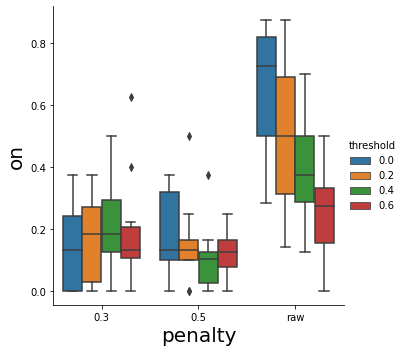

In [217]:
sns.catplot(data=anyswitch_ratio_per_animal,x='penalty',y='on',hue='threshold',kind='box')
# sns.swarmplot(data=anyswitch_ratio_per_animal,x='penalty',y='on',hue='threshold')



In [153]:
sesscount_per_animal = anyswitch_per_all.unstack(level=(4,5,6)).groupby(level=0).count().iloc[:,0]

sesscount_per_animal

e13_16f1    18
e13_26m1    10
e14_2m3      8
e15_10m1    10
e15_13f1     8
e15_9f1      6
e16_1f1     14
e16_2m1      4
e16_3m1      8
e16_3m2      8
Name: (off, raw, switch_magnitude, 0.0), dtype: int64

In [35]:
switch_detection_res_allsess[detection]['sig_pos'].groupby(level=(0,1,4,5,6)).any()

on                       \
                                                      0      1      2      3    
e13_16f1 e13_16f1_210302 raw switch_magnitude 0.0  False   True  False   True   
                                              0.2  False   True  False  False   
                                              0.4  False   True  False  False   
                                              0.6  False   True  False  False   
                         0.3 switch_magnitude 0.0  False  False  False  False   
...                                                  ...    ...    ...    ...   
e16_3m2  e16_3m2_211213  0.3 switch_magnitude 0.6  False  False  False  False   
                         0.5 switch_magnitude 0.0  False  False  False  False   
                                              0.2  False  False  False  False   
                                              0.4  False  False  False  False   
                                              0.6  False  False  False  False   

                                                                               \
                                                      4      5      6      7    
e13_16f1 e13_16f1_210302 raw switch_magnitude 0.0   True  False  False  False   
                                              0.2   True  False  False  False   
                                              0.4  False  False  False  False   
                                              0.6  False  False  False  False   
                         0.3 switch_magnitude 0.0   True  False  False  False   
...                                                  ...    ...    ...    ...   
e16_3m2  e16_3m2_211213  0.3 switch_magnitude 0.6  False  False  False  False   
                         0.5 switch_magnitude 0.0  False   True  False  False   
                                              0.2  False   True  False  False   
                                              0.4  False   True  False  False   
                                              0.6  False  False  False  False   

                                                                 ...    off  \
                                                      8      9   ...     31   
e13_16f1 e13_16f1_210302 raw switch_magnitude 0.0  False  False  ...  False   
                                              0.2  False  False  ...  False   
                                              0.4  False  False  ...  False   
                                              0.6  False  False  ...  False   
                         0.3 switch_magnitude 0.0  False  False  ...  False   
...                                                  ...    ...  ...    ...   
e16_3m2  e16_3m2_211213  0.3 switch_magnitude 0.6  False  False  ...  False   
                         0.5 switch_magnitude 0.0  False  False  ...  False   
                                              0.2  False  False  ...  False   
                                              0.4  False  False  ...  False   
                                              0.6  False  False  ...  False   

                                                             on                \
                                                      32     33     34     35   
e13_16f1 e13_16f1_210302 raw switch_magnitude 0.0  False  False  False  False   
                                              0.2  False  False  False  False   
                                              0.4  False  False  False  False   
                                              0.6  False  False  False  False   
                         0.3 switch_magnitude 0.0  False  False  False  False   
...                                                  ...    ...    ...    ...   
e16_3m2  e16_3m2_211213  0.3 switch_magnitude 0.6  False  False  False  False   
                         0.5 switch_magnitude 0.0  False  False  False  False   
                                              0.2  False  False  False  False   
                           

In [30]:
df=switch_detection_res_allsess[detection]['sig_pos'].groupby(level=(0,1,4,5,6)).any().groupby(axis=1,level=0).sum()
df=df.unstack(level=(-1,-2,-3))
df['n_pyr'] = db_sorted.reset_index(drop=True).set_index(['animal_name.1','sess_name']).loc[df.index]['n_pyr_putative']



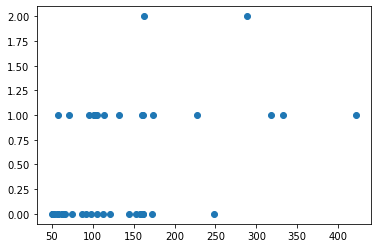

In [32]:
%matplotlib inline
plt.scatter(df['n_pyr'],df[('on',0.4,'switch_magnitude',0.3)])

In [14]:
pf_res=place_field_res_l[('e13_26m1', 'e13_26m1_210913')]

In [229]:
pf_res[detection]

{'params': {(0,
   0.0):                       0          1          2          3          4   \
  fr_mean 3   0   0.361854   1.660383   0.895757   0.000000   0.469987   
          27  0  14.423230  13.955614  23.307238  20.632551  24.110986   
          29  0   5.357048   8.640619  11.218283   9.660357   6.298226   
              1   9.346967   7.827861  16.289806  15.501734   6.856234   
              2   3.571470  17.356635  13.154855   7.584357   9.771180   
  ...                  ...        ...        ...        ...        ...   
  std     463 0   0.532035        NaN   1.159773        NaN        NaN   
          465 0   0.000000   2.465857        NaN   2.361952        NaN   
          475 0   3.352249   2.988355   3.182268   2.981122   2.891080   
          476 0   2.050810   2.445631   2.487639   2.899385   2.937413   
          480 0   3.169987   3.017373   3.525848   4.969031   3.791196   
  
                        5          6          7          8          9   ...  \
  fr_me

In [225]:
detection = 'avg'
switch_detection_res_allsess[detection]['changes_df']

0   1   2   3   \
e13_26m1 e13_26m1_210913 0 0 raw switch_magnitude 0.0 3  0   0   1  -1  -1   
                                                      27 0   0  -1   1  -1   
                                                      29 0   0   1   1  -1   
                                                         1   0  -1   1  -1   
                                                         2   0   1  -1  -1   
...                                                         ..  ..  ..  ..   
e16_1f1  e16_1f1_200923  0 1 0.5 switch_magnitude 0.6 60 1   0   0   0   0   
                                                      61 0   0   0   0  -1   
                                                         1   0   0   0   0   
                                                         2   0   0   0   0   
                                                      63 0   0   0   0   0   

                                                            4   5    6    7   \
e13_26m1 e13_26m1_210913 0 0 raw switch_magnitude 0.0 3  0   1  -1  0.0  0.0   
                                                      27 0   1  -1  1.0 -1.0   
                                                      29 0  -1   1 -1.0 -1.0   
                                                         1  -1   1 -1.0  1.0   
                                                         2   1  -1  1.0 -1.0   
...                                                         ..  ..  ...  ...   
e16_1f1  e16_1f1_200923  0 1 0.5 switch_magnitude 0.6 60 1   0   0  0.0  0.0   
                                                      61 0   0   0  0.0  0.0   
                                                         1   0   0  0.0  0.0   
                                                         2   0   0  0.0  0.0   
                                                      63 0   0   0  0.0  0.0   

                                                             8    9   ...  \
e13_26m1 e13_26m1_210913 0 0 raw switch_magnitude 0.0 3  0  0.0  1.0  ...   
                                                      27 0 -1.0  1.0  ...   
                                                      29 0  1.0 -1.0  ...   
                                                         1  1.0  1.0  ...   
                                                         2  1.0  1.0  ...   
...                                                         ...  ...  ...   
e16_1f1  e16_1f1_200923  0 1 0.5 switch_magnitude 0.6 60 1  0.0  NaN  ...   
                                                      61 0  0.0  NaN  ...   
                                                         1  0.0  NaN  ...   
                                                         2  0.0  NaN  ...   
                                                      63 0  0.0  NaN  ...   

                                                             27   28   29  \
e13_26m1 e13_26m1_210913 0 0 raw switch_magnitude 0.0 3  0 -1.0  1.0 -1.0   
                                                      27 0 -1.0  1.0  1.0   
                                                      29 0  1.0 -1.0 -1.0   
                                                         1  1.0 -1.0  1.0   
                                                         2 -1.0 -1.0  1.0   
...                                                         ...  ...  ...   
e16_1f1  e16_1f1_200923  0 1 0.5 switch_magnitude 0.6 60 1  NaN  NaN  NaN   
                                                      61 0  NaN  NaN  NaN   
                                                         1  NaN  NaN  NaN   
                                                         2  NaN  NaN  NaN   
                                                      63 0  NaN  NaN  NaN   

                                                             30   31   32  33  \
e13_26m1 e13_26m1_210913 0 0 raw switch_magnitude 0.0 3  0 -1.0 -1.0  1.0 NaN   
                                                      27 0 -1.0  1.0 -1.0 NaN   
                                                      29 0  1.0 -1.0 

In [226]:
changes = switch_detection_res_allsess[detection]['changes_df'].loc[('e13_26m1','e13_26m1_210913',0,0,'raw','switch_magnitude',0)]
inds_d = cpa.get_inds_switch_sametrial_sorted(changes)

/tmp/ipykernel_708634/1502387388.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes = switch_detection_res_allsess[detection]['changes_df'].loc[('e13_26m1','e13_26m1_210913',0,0,'raw','switch_magnitude',0)]


In [232]:
all_fields = pf_res[detection]['all_fields'][0,0]
coswitching_coms,coswitching_coms_binned,field_loc_histogram = cpa.get_switching_com_distribution_per_trial(all_fields,inds_d, field_loc_key='com',coarse_bins=np.arange(0,101,10))




In [257]:
all_fields

start end com peak    fr_peak    fr_mean
    field_index                                         
3   0              24  40  32   32   2.170109   1.186789
27  0               1  29  15   15  27.424702  21.800694
29  0               1  10   5    5   7.028432   6.672925
    1              20  38  29   29  22.029687  13.633616
    2              69  84  76   77  13.042493    9.54132
...               ...  ..  ..  ...        ...        ...
463 0              23  28  25   26    1.38704   1.210603
465 0              13  33  23   21   2.176381   1.269428
475 0              23  42  33   37   4.572736   2.884757
476 0              28  49  37   29   1.140562   0.891207
480 0              71  90  80   81   8.991181   6.516449

[381 rows x 6 columns]

In [258]:
changes

0   1   2   3   4   5    6    7    8    9    10   11   12   13   14
7   0   0   0   0   0   0   0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    1   0   0   0   0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8   0   0   0   0   0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    1   0   0   0   0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    2   0   0   0   0   1   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...    ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...
133 0   0   0   0   0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
134 1   0   0   0   0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    2   0   0   0   0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
135 0   0   0   0   0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    1   0   0   0   0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[167 rows x 15 columns]

In [61]:
reload(cpa)

<module 'change_point_analysis' from '/mnt/home/szheng/projects/nmf_analysis/change_point_analysis.py'>

In [62]:
%%time
# distribution of field
detection='avg'
gpb = switch_detection_res_allsess[detection]['changes_df'].groupby(level=(0,1,2,3,4,5,6))
coswitching_coms_binned_l = {}
field_loc_histogram_l = {}
coswitching_coms_binned_ratio_l = {}
coswitching_per_trial_ratio_l = {}
for ind,changes in gpb:
    changes = changes.dropna(axis=1).droplevel((0,1,2,3,4,5,6))
    ani,sess,ti,tt,pen,sw_def,thresh = ind
    inds_d = cpa.get_inds_switch_sametrial_sorted(changes)
    all_fields = place_field_res_l[ani,sess][detection]['all_fields'][ti,tt]
    coswitching_coms,coswitching_coms_binned,field_loc_histogram,coswitching_coms_binned_ratio,coswitching_per_trial_ratio = cpa.get_switching_com_distribution_per_trial(all_fields,inds_d, field_loc_key='com',coarse_bins=np.arange(0,101,10))
    coswitching_coms_binned_l[ind] = coswitching_coms_binned.T
    field_loc_histogram_l[ind] = pd.Series(field_loc_histogram)
    coswitching_coms_binned_ratio_l[ind] = coswitching_coms_binned_ratio.T
    coswitching_per_trial_ratio_l[ind]=coswitching_per_trial_ratio.T
coswitching_coms_binned_l = pd.concat(coswitching_coms_binned_l,axis=0)
field_loc_histogram_l = pd.concat(field_loc_histogram_l,axis=0)
coswitching_coms_binned_ratio_l = pd.concat(coswitching_coms_binned_ratio_l,axis=0)
coswitching_per_trial_ratio_l = pd.concat(coswitching_per_trial_ratio_l,axis=0)





CPU times: user 29.8 s, sys: 44.6 ms, total: 29.8 s
Wall time: 29.8 s


In [289]:
ind = (slice(None),slice(None),slice(None),slice(None),0.3,'switch_magnitude',0.4)
coswitching_coms_binned_l_combincol.loc[(*ind,1),:]





0    1    2  \
e13_16f1 e13_16f1_210302 0 0 0.3 switch_magnitude 0.4 1 1   0.0  0.0  3.0   
                                                        2   0.0  5.0  0.0   
                                                        3   0.0  1.0  0.0   
                                                        4   1.0  0.0  0.0   
                                                        5   0.0  0.0  0.0   
...                                                         ...  ...  ...   
e16_3m2  e16_3m2_211213  0 1 0.3 switch_magnitude 0.4 1 12  0.0  0.0  3.0   
                                                        13  3.0  0.0  0.0   
                                                        14  1.0  1.0  1.0   
                                                        15  0.0  1.0  2.0   
                                                        16  0.0  1.0  1.0   

                                                              3    4    5  \
e13_16f1 e13_16f1_210302 0 0 0.3 switch_magnitude 0.4 1 1   2.0  5.0  0.0   
                                                        2   2.0  2.0  1.0   
                                                        3   1.0  0.0  1.0   
                                                        4   1.0  1.0  1.0   
                                                        5   1.0  0.0  0.0   
...                                                         ...  ...  ...   
e16_3m2  e16_3m2_211213  0 1 0.3 switch_magnitude 0.4 1 12  0.0  0.0  0.0   
                                                        13  0.0  0.0  0.0   
                                                        14  1.0  3.0  2.0   
                                                        15  0.0  2.0  1.0   
                                                        16  0.0  0.0  1.0   

                                                              6    7    8    9  
e13_16f1 e13_16f1_210302 0 0 0.3 switch_magnitude 0.4 1 1   0.0  1.0  0.0  0.0  
                                                        2   0.0  0.0  1.0  0.0  
                                                        3   2.0  1.0  1.0  0.0  
                                                        4   0.0  1.0  1.0  0.0  
                                                        5   1.0  0.0  1.0  0.0  
...                                                         ...  ...  ...  ...  
e16_3m2  e16_3m2_211213  0 1 0.3 switch_magnitude 0.4 1 12  1.0  2.0  1.0  0.0  
                                                        13  0.0  0.0  0.0  0.0  
                                                        14  0.0  1.0  1.0  0.0  
                                                        15  4.0  3.0  3.0  0.0  
                                                        16  1.0  0.0  4.0  1.0  

[1060 rows x 10 columns]

In [28]:
# ind = (slice(None),slice(None),slice(None),slice(None),0.3,'switch_magnitude',0.4)
ind = (slice(None),slice(None),slice(None),slice(None),'raw','switch_magnitude',0.4)
switch_ratio_by_combinned_trial_mean_allsess= coswitching_coms_binned_ratio_l.loc[ind,:].groupby(level=(-1)).mean()
switch_ratio_by_combinned_trial_median_peranimal= coswitching_coms_binned_ratio_l.loc[ind,:].groupby(level=(0,-1)).median()



<AxesSubplot:>

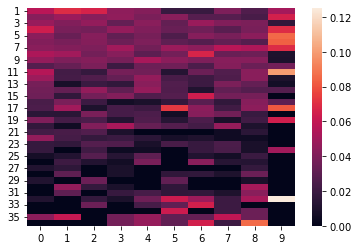

In [318]:
sns.heatmap(switch_ratio_by_combinned_trial_mean_allsess.loc[:,1].T)

In [336]:
ani_l=switch_ratio_by_combinned_trial_median_peranimal.index.get_level_values(0).unique()

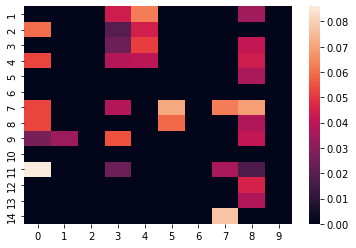

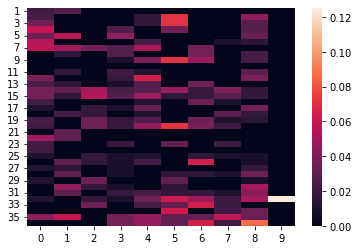

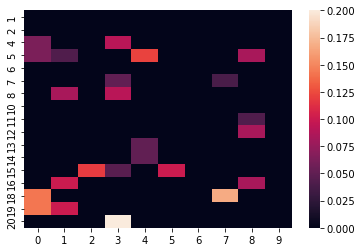

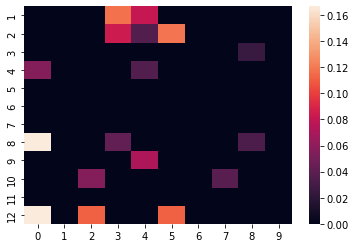

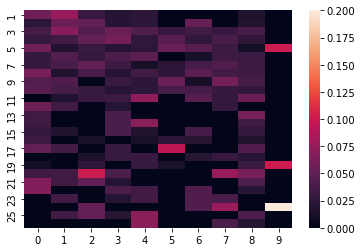

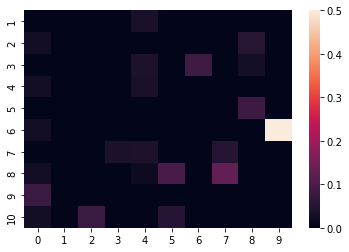

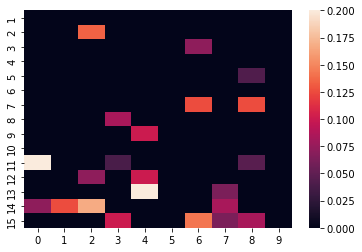

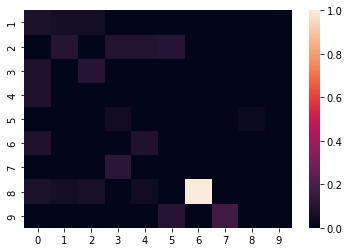

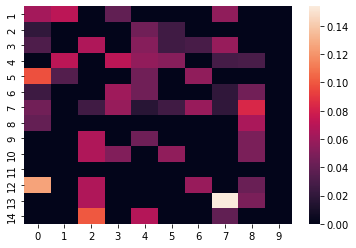

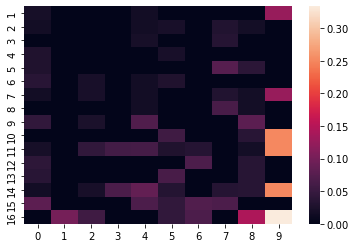

In [341]:
for ani in ani_l:
    df=switch_ratio_by_combinned_trial_median_peranimal.loc[ani]
    plt.figure()
    sns.heatmap(df.loc[:,1].T.dropna())

In [ ]:
# spatial distribution


In [349]:
sr_pos_peranimal_meantrial_mediansess.reset_index()

,level_0,level_1,0
0,e13_16f1,0,0.023559
1,e13_16f1,1,0.002381
2,e13_16f1,2,0.000000
3,e13_16f1,3,0.017308
4,e13_16f1,4,0.014161
...,...,...,...
95,e16_3m2,5,0.020956
96,e16_3m2,6,0.014881
97,e16_3m2,7,0.020619
98,e16_3m2,8,0.029361


Text(0.5, 1.0, '(n switching / n place field) at that position bin, trial averaged')

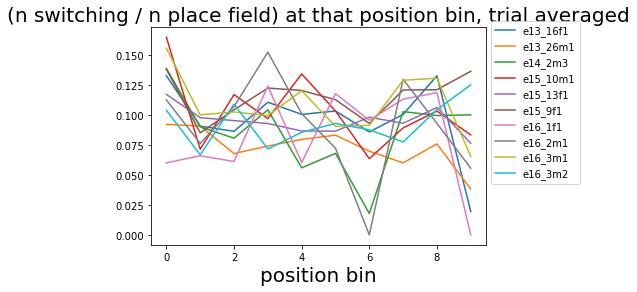

In [30]:
%matplotlib inline
sr_pos_peranimal_meantrial_mediansess=switch_ratio_by_combinned_trial_median_peranimal.loc[:,1].mean(axis=1)
sr_pos_peranimal_meantrial_mediansess=sr_pos_peranimal_meantrial_mediansess.unstack().T
ax=sr_pos_peranimal_meantrial_mediansess.plot()
ax.legend(bbox_to_anchor=[1,1.05])
# ax.set_ylim([0,0.04])
ax.set_xlabel('position bin')
ax.set_title('(n switching / n place field) at that position bin, trial averaged')

<AxesSubplot:xlabel='pos bin', ylabel='val'>

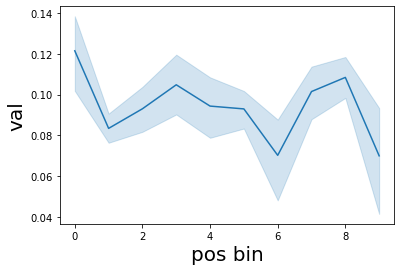

In [31]:
sr_pos_peranimal_meantrial_mediansess=switch_ratio_by_combinned_trial_median_peranimal.loc[:,1].mean(axis=1).reset_index()
sr_pos_peranimal_meantrial_mediansess.columns=['animal','pos bin','val']
sns.lineplot(data=sr_pos_peranimal_meantrial_mediansess,x='pos bin',y='val')


In [385]:
df=coswitching_coms_binned_l_combincol.loc[(*ind,1),:]
switching_count=df.sum()

In [380]:
ntrials_all = df.groupby(level=(0,1,2,3,4,5,6)).count().iloc[:,0]

In [408]:
base=(field_loc_histogram_l.loc[ind].unstack() * ntrials_all.values[:,None]).sum()

In [410]:
p

0    0.039801
1    0.036238
2    0.034152
3    0.033281
4    0.036170
5    0.029736
6    0.032367
7    0.030940
8    0.033574
9    0.044321
dtype: float64

<AxesSubplot:>

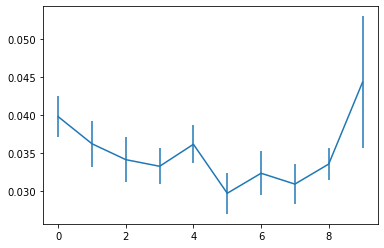

In [411]:
# switching_count = coswitching_coms_binned.groupby(level=0).sum()
# ntrials = coswitching_coms_binned.loc[1].shape[0]
# base = field_loc_histogram * ntrials
# p = (switching_count / base).T.drop([0,9])
p = (switching_count / base).T
se = np.sqrt((p * (1-p)) / base)
p.plot(yerr=se * 1.96)

In [361]:
sr_pos_peranimal_meantrial_mediansess

,e13_16f1,e13_26m1,e14_2m3,e15_10m1,e15_13f1,e15_9f1,e16_1f1,e16_2m1,e16_3m1,e16_3m2
0,0.023559,0.019104,0.021617,0.032407,0.031290,0.021566,0.014286,0.043651,0.031905,0.023572
1,0.002381,0.014520,0.023058,0.000000,0.025702,0.000000,0.019737,0.022222,0.012585,0.006250
2,0.000000,0.010677,0.006213,0.013889,0.026172,0.005495,0.019580,0.023611,0.032832,0.011754
3,0.017308,0.012408,0.025120,0.020157,0.026130,0.025510,0.011673,0.028139,0.019878,0.007747
4,0.014161,0.018531,0.011673,0.018669,0.027704,0.017549,0.021053,0.023990,0.026423,0.024092
5,0.009304,0.019779,0.005263,0.019097,0.015249,0.013961,0.013158,0.022222,0.013367,0.020956
6,0.000000,0.017286,0.000000,0.000000,0.021226,0.005952,0.038910,0.111111,0.014472,0.014881
7,0.012510,0.009281,0.010796,0.003205,0.023597,0.019643,0.024123,0.018519,0.026557,0.020619
8,0.028722,0.020661,0.020375,0.004861,0.028380,0.030284,0.015550,0.002778,0.029074,0.029361
9,0.000000,0.003472,0.000000,0.000000,0.015385,0.050000,0.000000,0.000000,0.000000,0.083333


# distribution across trials

In [64]:
coswitching_per_trial_ratio_l_df = coswitching_per_trial_ratio_l.unstack(level=-2).reset_index()
coswitching_per_trial_ratio_l_df.columns = ['animal','session','task','trialtype','penalty','sw_def','threshold','trial','off','on']



coswitching_per_trial_ratio_l_df=coswitching_per_trial_ratio_l_df.fillna(0)

In [91]:
df=coswitching_per_trial_ratio_l_df.set_index(['penalty','threshold']).loc[0.3,0.4].reset_index()

/tmp/ipykernel_809573/2898967495.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=coswitching_per_trial_ratio_l_df.set_index(['penalty','threshold']).loc[0.3,0.4].reset_index()


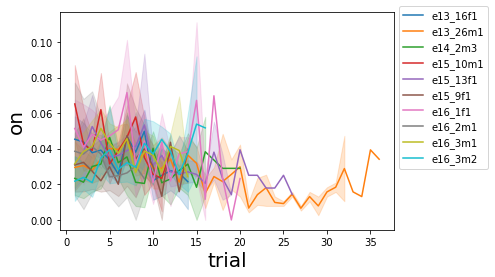

In [94]:
ax=sns.lineplot(data=df,x='trial',y='on',hue='animal')
ax.legend(bbox_to_anchor=[1,1.05])

# distribution across trials with time warping

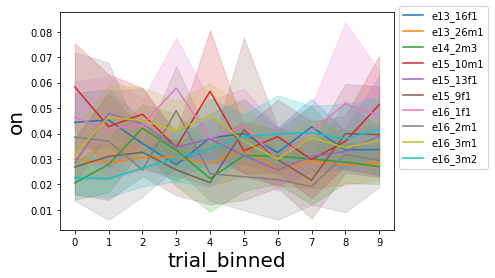

In [109]:
ntrialbins = 10
df['trial_binned'] = df.groupby(['session','task','trialtype']).apply(lambda x:pd.cut(x['trial'],ntrialbins,labels=False)).values


from matplotlib.ticker import MaxNLocator
ax=sns.lineplot(data=df,x='trial_binned',y='on',hue='animal')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend(bbox_to_anchor=[1,1.05])

# spread of the coms during each trial

In [135]:
sig_pos_trials

on   0     False
     1     False
     2     False
     3     False
     4     False
     5     False
     6     False
     7     False
     8     False
     9     False
     10    False
     11    False
     12    False
     13    False
     14    False
off  0     False
     1     False
     2     False
     3     False
     4     False
     5     False
     6     False
     7     False
     8     False
     9     False
     10    False
     11    False
     12    False
     13    False
     14    False
Name: (e13_16f1, e13_16f1_210302, 0, 0, 0.3, switch_magnitude, 0.0), dtype: bool

In [141]:
coswitching_coms['com']

 1  1   0    35
        1    41
        2    20
        3    35
        4    44
             ..
-1  11  2    78
    12  0    34
        1     6
        2    39
    13  0    46
Name: com, Length: 114, dtype: object

level_0  level_1
 1       0          False
         1          False
         2          False
         3          False
         4          False
         5          False
         6          False
         7          False
         8          False
         9          False
         10         False
         11         False
         12         False
         13         False
         14         False
-1       0          False
         1          False
         2          False
         3          False
         4          False
         5          False
         6          False
         7          False
         8          False
         9          False
         10         False
         11         False
         12         False
         13         False
         14         False
Name: (e13_16f1, e13_16f1_210302, 0, 0, 0.3, switch_magnitude, 0.0), dtype: bool

In [185]:
coswitching_coms['com'].unstack().astype(float)

0     1     2     3     4     5     6     7     8     9   ...    40  \
 1 1    4.0  22.0   5.0  90.0  78.0  48.0   NaN   NaN   NaN   NaN  ...   NaN   
   2   57.0  65.0  64.0  44.0  88.0   NaN   NaN   NaN   NaN   NaN  ...   NaN   
   3   59.0   5.0  59.0  40.0  27.0  84.0  43.0  50.0  49.0  20.0  ...   NaN   
   4    9.0  14.0   4.0  22.0  29.0  90.0  88.0   NaN   NaN   NaN  ...   NaN   
   5   82.0   7.0  74.0  49.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
   6   35.0  45.0  90.0  67.0  82.0  88.0   NaN   NaN   NaN   NaN  ...   NaN   
   7   80.0  52.0  89.0  73.0  27.0  43.0  43.0  26.0   NaN   NaN  ...   NaN   
   8   88.0  42.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
   9   51.0  74.0  86.0  84.0  50.0  41.0  90.0  15.0  49.0  87.0  ...   NaN   
   10  36.0  56.0  64.0  49.0  88.0   3.0   NaN   NaN   NaN   NaN  ...   NaN   
   11  54.0  59.0  59.0  27.0  88.0  60.0  66.0  43.0  50.0  49.0  ...   NaN   
   12  27.0  27.0  83.0  28.0  79.0  66.0  73.0   3.0   NaN   NaN  ...   NaN   
   13   4.0   5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
   14  33.0  86.0  36.0  85.0   8.0  47.0  29.0  84.0  57.0  52.0  ...  49.0   
   15  82.0  82.0  59.0  73.0  61.0  78.0  78.0  67.0  76.0  42.0  ...   NaN   
   16  89.0  24.0  84.0  65.0  89.0  60.0  90.0   NaN   NaN   NaN  ...   NaN   
-1 1    9.0  51.0  84.0  59.0  53.0  89.0  78.0  84.0  54.0  49.0  ...   NaN   
   2   54.0  58.0  24.0  62.0  78.0  90.0  78.0  48.0   NaN   NaN  ...   NaN   
   3   57.0  65.0  64.0  29.0  34.0  88.0   NaN   NaN   NaN   NaN  ...   NaN   
   4   85.0   5.0  59.0   6.0  27.0  84.0  43.0  50.0  65.0  49.0  ...   NaN   
   5   82.0  90.0  33.0  49.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
   6   80.0  30.0  74.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
   7   13.0   4.0  45.0  67.0  82.0   NaN   NaN   NaN   NaN   NaN  ...   NaN   
   8   59.0  89.0  86.0  50.0  27.0  51.0   NaN   NaN   NaN   NaN  ...   NaN   
   9   27.0  42.0  82.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
   10  74.0  73.0  84.0  50.0  90.0  15.0  49.0   NaN   NaN   NaN  ...   NaN   
   11  50.0  36.0  49.0  64.0  88.0   3.0   NaN   NaN   NaN   NaN  ...   NaN   
   12  54.0  59.0  58.0  59.0  27.0  88.0  60.0  65.0  50.0  49.0  ...   NaN   
   13  33.0   8.0  47.0  29.0  38.0  57.0   4.0  41.0  54.0  13.0  ...  49.0   
   14   4.0   5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
   15  54.0  58.0  24.0  50.0  65.0  77.0  49.0  82.0   NaN   NaN  ...   NaN   
   16  59.0  59.0  49.0  66.0   5.0  48.0  82.0  61.0  78.0  67.0  ...   NaN   

         41    42    43    44    45    46    47    48    49  
 1 1    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   2    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   3    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   4    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   5    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   6    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   7    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   8    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   9    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   11   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   12   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   13   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   14  82.0  51.0  87.0  54.0  26.0  88.0  85.0  86.0  49.0  
   15   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   16   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
-1 1    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   2    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   3    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   4    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   5    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
   6

In [186]:
scipy.stats.circstd(coswitching_coms['com'].unstack().astype(float),high=99.,low=0.,axis=1,nan_policy='omit')

array([22.43552814, 14.5656139 , 23.08366748, 14.47112941, 22.33455937,
       23.97856742, 26.42068474, 33.04840105, 25.90431555, 25.20864785,
       14.66210028, 32.91810162,  0.50004197, 34.28487437, 18.2414883 ,
       18.69846704, 20.88423388, 19.87289154, 21.81763953, 37.5959726 ,
       31.29656787, 23.4716824 , 29.38563657, 24.44043878, 25.66840935,
       22.43953475, 25.67855043, 12.46137184, 24.39837904,  0.50004197,
       17.08609203, 17.58678501])

In [179]:
coswitching_coms['com'].unstack().apply(lambda x:scipy.stats.circstd(x,high=99.,low=0.),axis=1)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sin method

In [187]:
com_std_per_trial

 1  1     36.999550
    2     16.009372
    3     22.970438
    4     36.741698
    5     33.734256
    6     23.232879
    7     23.966867
    8     32.526912
    9     25.148669
    10    28.563380
    11    15.169629
    12    30.335034
    13     0.707107
    14    26.904434
    15    20.659830
    16    24.295796
-1  1     24.027762
    2     20.750215
    3     21.830407
    4     29.254370
    5     26.987651
    6     27.300794
    7     33.611010
    8     23.610732
    9     28.431204
    10    25.996337
    11    28.387791
    12    13.564660
    13    23.487585
    14     0.707107
    15    18.126047
    16    21.343910
dtype: float64

In [200]:
coswitching_coms_binned.sum(axis=1)

 1  1      6
    2      5
    3     13
    4      7
    5      4
    6      6
    7      8
    8      2
    9     10
    10     6
    11    17
    12     8
    13     2
    14    50
    15    15
    16     7
-1  1     10
    2      8
    3      6
    4     11
    5      4
    6      3
    7      5
    8      6
    9      3
    10     7
    11     6
    12    15
    13    49
    14     2
    15     8
    16    16
dtype: int64

In [204]:
ma

 1  1      True
    2      True
    3      True
    4      True
    5     False
    6     False
    7     False
    8      True
    9      True
    10    False
    11     True
    12     True
    13    False
    14    False
-1  1     False
    2     False
    3      True
    5     False
    6      True
    7      True
    8      True
    9     False
    10    False
    11    False
    12    False
    13    False
dtype: bool

In [205]:
coswitching_coms['com'].unstack().loc[ma]

0   1   2   3    4    5    6    7    8    9    10
 1 1   35  41  20  35   44   21   22   40   40   77   40
   2   38  40  17  19   57   16   17   80   33   41   12
   3   15  53  34  67   73   65   85  NaN  NaN  NaN  NaN
   4   55  45  87  33    3   77  NaN  NaN  NaN  NaN  NaN
   8    9  75  34  47   50   12   86   49   78  NaN  NaN
   9   89  13  10  46   37    4  NaN  NaN  NaN  NaN  NaN
   11   3  86   6  79   39  NaN  NaN  NaN  NaN  NaN  NaN
   12  87  81  80  89   85  NaN  NaN  NaN  NaN  NaN  NaN
-1 3   41  59  44  40   54  NaN  NaN  NaN  NaN  NaN  NaN
   6   38  87  68  78   61   37  NaN  NaN  NaN  NaN  NaN
   7   45  80  35  88  NaN  NaN  NaN  NaN  NaN  NaN  NaN
   8   35  73  40  70   85  NaN  NaN  NaN  NaN  NaN  NaN

In [211]:
ma

 1  2    False
    3    False
    4    False
    5    False
    6    False
-1  1    False
    2    False
    3    False
    4    False
dtype: bool

In [219]:
%%time
# distribution of field
detection='avg'
gpb = switch_detection_res_allsess[detection]['changes_df'].groupby(level=(0,1,2,3,4,5,6))
com_std_per_trial_l = {}
com_std_per_trial_l_sig_pos_only = {}
min_neuron_to_be_considered = 4
for ind,changes in gpb:
    changes = changes.dropna(axis=1).droplevel((0,1,2,3,4,5,6))
    sig_pos_trials = switch_detection_res_allsess[detection]['sig_pos'].loc[ind].dropna().astype(bool)
    # rename onoff to 1/-1
    sig_pos_trials_=sig_pos_trials.reset_index()
    sig_pos_trials_['level_0']=sig_pos_trials_['level_0'].map({'on':1,'off':-1})
    sig_pos_trials_=sig_pos_trials_.set_index(['level_0','level_1'],drop=True).squeeze()
    
    
    ani,sess,ti,tt,pen,sw_def,thresh = ind
    inds_d = cpa.get_inds_switch_sametrial_sorted(changes)
    all_fields = place_field_res_l[ani,sess][detection]['all_fields'][ti,tt]
    coswitching_coms,coswitching_coms_binned,field_loc_histogram,coswitching_coms_binned_ratio,coswitching_per_trial_ratio = cpa.get_switching_com_distribution_per_trial(all_fields,inds_d, field_loc_key='com',coarse_bins=np.arange(0,101,10))
#     com_std_per_trial = coswitching_coms['com'].unstack().std(axis=1)
    # filter out trials with too few neurons
    ma = coswitching_coms_binned.sum(axis=1) >= min_neuron_to_be_considered
    if ma.any():
        com_std_per_trial = scipy.stats.circstd(coswitching_coms['com'].unstack().loc[ma].astype(float),high=99.,low=0.,axis=1,nan_policy='omit')
        com_std_per_trial = pd.Series(com_std_per_trial,index=coswitching_coms['com'].loc[ma].unstack().index)
        com_std_per_trial_l[ind] = com_std_per_trial
        com_std_per_trial_l_sig_pos_only[ind] = com_std_per_trial.loc[sig_pos_trials_.loc[com_std_per_trial.index]]

com_std_per_trial_l = pd.concat(com_std_per_trial_l,axis=0)
com_std_per_trial_l_sig_pos_only = pd.concat(com_std_per_trial_l_sig_pos_only,axis=0)
    




CPU times: user 50.4 s, sys: 38.7 ms, total: 50.5 s
Wall time: 50.5 s


In [157]:
ind_one = (slice(None),slice(None),slice(None),slice(None),'raw','switch_magnitude',0.4)

In [164]:
com_std_per_trial_l.loc[ind_one].unstack(level=-2).groupby(level=(0)).median()

,-1,1
e13_16f1,27.203715,26.877691
e13_26m1,26.582142,26.725670
e14_2m3,27.522112,27.509998
e15_10m1,25.810410,25.728435
e15_13f1,28.298822,27.594818
e15_9f1,25.726769,25.630261
e16_1f1,23.215348,24.810574
e16_2m1,27.518257,26.448533
e16_3m1,27.626420,27.509124
e16_3m2,28.614269,27.204979


/tmp/ipykernel_809573/2587125738.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=com_std_per_trial_l_df.set_index(['penalty','threshold']).loc[0.3,0.4].reset_index()


(0.0, 50.0)

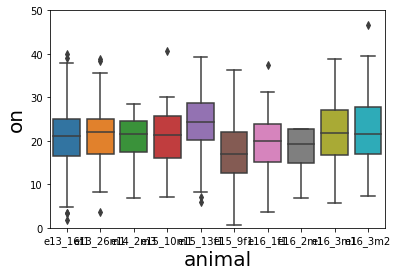

In [222]:
com_std_per_trial_l_df = com_std_per_trial_l.unstack(level=-2).reset_index()
com_std_per_trial_l_df.columns = ['animal','session','task','trialtype','penalty','sw_def','threshold','trial','off','on']



# com_std_per_trial_l_df=com_std_per_trial_l_df.fillna(0)

df=com_std_per_trial_l_df.set_index(['penalty','threshold']).loc[0.3,0.4].reset_index()

ax=sns.boxplot(data=df,x='animal',y='on')
ax.set_ylim((0,50))

/tmp/ipykernel_809573/3003996751.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=com_std_per_trial_l_sig_pos_only_df.set_index(['penalty','threshold']).loc[0.3,0.4].reset_index()


(0.0, 50.0)

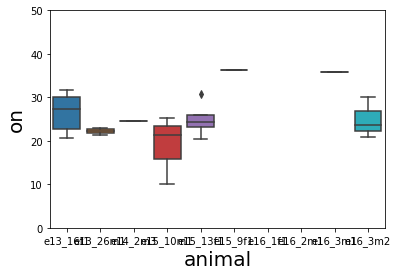

In [221]:
com_std_per_trial_l_sig_pos_only_df = com_std_per_trial_l_sig_pos_only.unstack(level=-2).reset_index()
com_std_per_trial_l_sig_pos_only_df.columns = ['animal','session','task','trialtype','penalty','sw_def','threshold','trial','off','on']



# com_std_per_trial_l_df=com_std_per_trial_l_df.fillna(0)

df=com_std_per_trial_l_sig_pos_only_df.set_index(['penalty','threshold']).loc[0.3,0.4].reset_index()

ax=sns.boxplot(data=df,x='animal',y='on')
ax.set_ylim((0,50))